<a href="https://colab.research.google.com/github/Garry864/Bike_Sharing_Demand_kaggle/blob/main/(SVC)_Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVC Classification

class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)[source]
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples. For large datasets consider using LinearSVC or SGDClassifier instead, possibly after a Nystroem transformer or other Kernel Approximation.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided kernel functions and how gamma, coef0 and degree affect each other, see the corresponding section in the narrative documentation: Kernel functions.

To learn how to tune SVC’s hyperparameters, see the following example: Nested versus non-nested cross-validation

Read more in the User Guide.

Parameters:
Cfloat, default=1.0
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty. For an intuitive visualization of the effects of scaling the regularization parameter C, see Scaling the regularization parameter for SVCs.

kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
Specifies the kernel type to be used in the algorithm. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples). For an intuitive visualization of different kernel types see Plot classification boundaries with different SVM Kernels.

degreeint, default=3
Degree of the polynomial kernel function (‘poly’). Must be non-negative. Ignored by all other kernels.

gamma{‘scale’, ‘auto’} or float, default=’scale’
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,

if ‘auto’, uses 1 / n_features

if float, must be non-negative.

# Data Implimentation from sklearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

<img src = "https://editor.analyticsvidhya.com/uploads/51518iris%20img1.png">

<img src = "https://www.researchgate.net/profile/Pratibha-Jadhav-3/publication/342859543/figure/fig1/AS:11431281214017463@1703304642085/Description-of-IRIS-dataset-showing-Petal-length-Sepal-length-Petal-width-and-Sepal.jpg">

## Feature analysis of data load_irs

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

NameError: name 'datasets' is not defined

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
print(type(iris.data))
print(type(iris.data.shape))

<class 'numpy.ndarray'>
<class 'tuple'>


In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
df.flower_name.value_counts()

flower_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [ ]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

**Sepal length vs Sepal Width (Setosa vs Versicolor)**

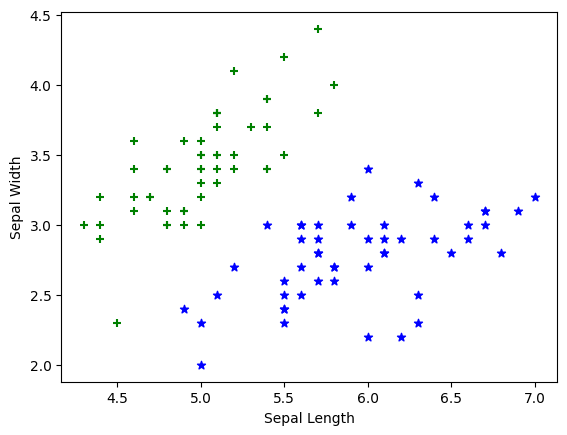

In [ ]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'green', marker = '+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'blue', marker = '*')

**Petal length vs Pepal Width (Setosa vs Versicolor)**

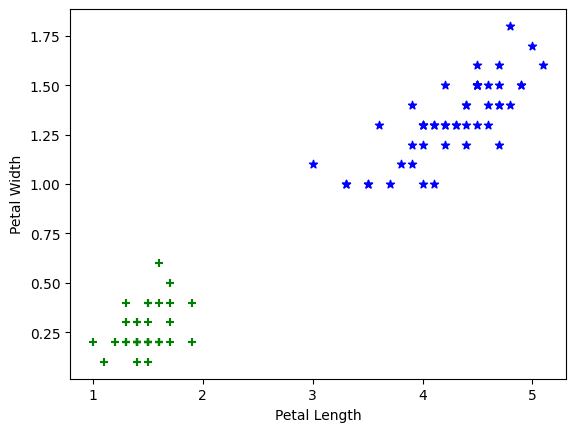

In [ ]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = 'green', marker = '+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'blue', marker = '*')

# **Train Support Vector Machine (SVM)**

## Selecting x and y

In [ ]:
x = df.drop(['target', 'flower_name'], axis = 'columns')
y = df.target

In [ ]:
x.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [ ]:
y.dtypes

dtype('int64')

In [ ]:
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


## Split the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


## Building the Model

In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

SVC()

In [ ]:
dir(model)

## Evalutaion metrics for SVC

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
def mscore(model):
    print('Training Score: ', model.score(x_train, y_train))
    print('Testing Score: ', model.score(x_test, y_test))


def mreport(model):
    y_pred = model.predict(x_test)
    print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
    print('Classification Report: \n', classification_report(y_test, y_pred))

In [ ]:
mscore(model)

Training Score:  0.9833333333333333
Testing Score:  0.9333333333333333


In [ ]:
mreport(model)

Confusion Matrix: 
 [[10  0  0]
 [ 0  7  1]
 [ 0  1 11]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.88      0.88         8
           2       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [ ]:
model.score(x_test, y_test)

0.9333333333333333

In [ ]:
x_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
100,6.3,3.3,6.0,2.5
138,6.0,3.0,4.8,1.8
136,6.3,3.4,5.6,2.4
120,6.9,3.2,5.7,2.3
122,7.7,2.8,6.7,2.0


In [ ]:
model.predict([[4.8,3.0,1.5,0.3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

# **Tune Parameters**

## 1. Regularization

In [ ]:
model_C1 = SVC(C=1) # c = Regularization
model_C1.fit(x_train, y_train)

mscore(model_C1)

Training Score:  0.9833333333333333
Testing Score:  0.9333333333333333


In [ ]:
model_C2 = SVC(C=10)
model_C2.fit(x_train, y_train)

mscore(model_C2)

Training Score:  0.9833333333333333
Testing Score:  1.0


## 2. Gamma

In [ ]:
model_g = SVC(gamma=10)
model_g.fit(x_train, y_train)

mscore(model_g)

Training Score:  1.0
Testing Score:  0.9666666666666667


## 3. kernel

In [ ]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
mscore(model_linear_kernal)

Training Score:  0.9833333333333333
Testing Score:  1.0


# Hyperparameter Tuning

### Before Hyperparameter tuning

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
S1 = cross_val_score(SVC(kernel='linear', C=10, gamma='auto'), iris.data, iris.target, cv=5)
print(S1)
print('Average Score : ', S1.mean())

[1.         1.         0.9        0.96666667 1.        ]
Average Score :  0.9733333333333334


In [ ]:
S2 = cross_val_score(SVC(kernel='rbf', C=10, gamma='auto'), iris.data, iris.target, cv=5)
print(21)
print('Average Score : ', S2.mean())

21
Average Score :  0.9800000000000001


In [ ]:
S3 = cross_val_score(SVC(kernel='rbf', C=20, gamma='auto'), iris.data, iris.target, cv=5)
print(S3)
print('Average Score : ', S3.mean())

[0.96666667 1.         0.9        0.96666667 1.        ]
Average Score :  0.9666666666666668


In [ ]:
kernels = ['rbf', 'linear']
c = [1, 10, 20]
avg_scores = {}
for kval in kernels:
    for cval in c:
        cv_scores = cross_val_score(SVC(kernel=kval, C=cval, gamma='auto'), iris.data, iris.target, cv=5)
        avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)

avg_scores

{'rbf_1': 0.9800000000000001,
 'rbf_10': 0.9800000000000001,
 'rbf_20': 0.9666666666666668,
 'linear_1': 0.9800000000000001,
 'linear_10': 0.9733333333333334,
 'linear_20': 0.9666666666666666}

### 1. GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'C':[0.001,0.0001,1,10,20],
              'kernel':['rbf','linear'],
              'gamma':[0.001,0.0001, 1, 10, 20]}

In [ ]:
model2 = SVC()

grid_svc = GridSearchCV(model2, parameters, cv=5, return_train_score = False) # return_train_score = False

grid_svc.fit(iris.data, iris.target)
grid_svc.cv_results_

{'mean_fit_time': array([0.00355587, 0.00218964, 0.00254936, 0.00225105, 0.00243936,
        0.00276446, 0.00252118, 0.0022656 , 0.00251369, 0.00254812,
        0.0025188 , 0.00207191, 0.00238018, 0.0020895 , 0.00251937,
        0.00213704, 0.00251274, 0.00217395, 0.00256672, 0.00220509,
        0.00246639, 0.0014204 , 0.00247493, 0.00135522, 0.002386  ,
        0.00140133, 0.0029036 , 0.00135846, 0.00300803, 0.0014832 ,
        0.00182528, 0.00141935, 0.0038672 , 0.00131378, 0.00204639,
        0.00154629, 0.00367126, 0.00156169, 0.00537224, 0.00221763,
        0.0016211 , 0.00126123, 0.00374165, 0.0028255 , 0.00180058,
        0.00265617, 0.00585208, 0.0013669 , 0.00470786, 0.00570698]),
 'std_fit_time': array([1.72831264e-03, 3.09338344e-05, 7.76882321e-05, 1.27604118e-04,
        4.06662988e-05, 1.38625341e-03, 9.47644243e-05, 1.34154777e-04,
        3.42929801e-05, 6.63346929e-04, 1.55981343e-04, 3.70006585e-05,
        1.91005277e-05, 4.48176198e-05, 5.66108336e-05, 1.06109886e-0

In [ ]:
DF = pd.DataFrame(grid_svc.cv_results_)
DF

In [ ]:
DF[["param_C", "param_kernel", "param_gamma", "mean_test_score"]].sort_values(by='mean_test_score', ascending=False)

,param_C,param_kernel,param_gamma,mean_test_score
25,1,linear,1,0.980000
21,1,linear,0.001,0.980000
29,1,linear,20,0.980000
27,1,linear,10,0.980000
23,1,linear,0.0001,0.980000
39,10,linear,20,0.973333
37,10,linear,10,0.973333
35,10,linear,1,0.973333
33,10,linear,0.0001,0.973333
31,10,linear,0.001,0.973333


In [ ]:
dir(grid_svc)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 '_validate_params',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_fe

In [ ]:
grid_svc.best_score_

0.9800000000000001

In [ ]:
grid_svc.best_params_ # showing Best Parameters for our model

{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}

In [ ]:
grid_svc.best_estimator_

SVC(C=1, gamma=0.001, kernel='linear')

In [ ]:
grid_svc.n_jobs

### 2. RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
parameters = {'C':[0.001,0.0001,1,10,20],
              'kernel':['rbf','linear'],
              'gamma':[0.001,0.0001, 1, 10, 20]}

In [ ]:
model3 = SVC()

Random_svc = RandomizedSearchCV(model3, parameters, cv=5, return_train_score = False, n_iter=3) # return_train_score = False

Random_svc.fit(iris.data, iris.target)
Random_svc.cv_results_

{'mean_fit_time': array([0.00188522, 0.00168605, 0.00080957]),
 'std_fit_time': array([6.57823836e-04, 3.58955633e-04, 3.46561231e-05]),
 'mean_score_time': array([0.00094013, 0.00078754, 0.00056181]),
 'std_score_time': array([2.62619527e-04, 5.22760993e-05, 1.33944568e-05]),
 'param_kernel': masked_array(data=['rbf', 'rbf', 'linear'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0.0001, 20, 20],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_C': masked_array(data=[10, 0.001, 10],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kernel': 'rbf', 'gamma': 0.0001, 'C': 10},
  {'kernel': 'rbf', 'gamma': 20, 'C': 0.001},
  {'kernel': 'linear', 'gamma': 20, 'C': 10}],
 'split0_test_score': array([0.86666667, 0.56666667, 1.        ]),
 'split1_test_score': array([0.96666667, 0.63333333, 1.        

In [ ]:
DF2 = pd.DataFrame(Random_svc.cv_results_)

In [ ]:
DF2[["param_C", "param_kernel", "param_gamma", "mean_test_score"]].sort_values(by='mean_test_score', ascending=False)

,param_C,param_kernel,param_gamma,mean_test_score
2,10,linear,20,0.973333
0,10,rbf,0.0001,0.913333
1,0.001,rbf,20,0.666667


In [ ]:
Random_svc.best_score_

0.9733333333333334

In [ ]:
Random_svc.best_params_

{'kernel': 'linear', 'gamma': 20, 'C': 10}

# Best Model evaluation through Hyperparameter tuning

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.naive_bayes import MultinomialNB

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}


In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [ ]:
sc = pd.DataFrame(scores,columns=['model','best_score','best_params'])
sc

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.960000,{'n_estimators': 5}
2,logistic_regression,0.966667,{'C': 5}
